In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_moons
from sklearn.preprocessing import StandardScaler
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn as mg

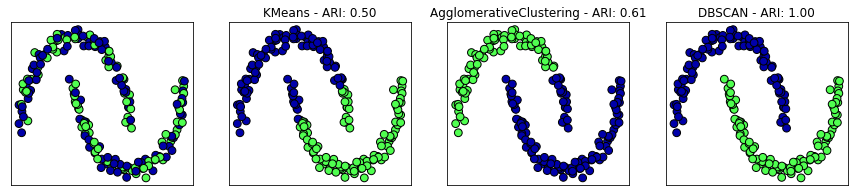

In [6]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
X, y = make_moons(n_samples = 200, noise = .05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                        subplot_kw={'xticks': (), 'yticks':()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
               cmap=mg.cm3, s=60, edgecolor='black')

for ax, algorithm in zip(axes[1:], algorithms):
    clusters= algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mg.cm3, s=60, edgecolor='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))

In [7]:
from sklearn.metrics import accuracy_score

cluster1 = [0, 0, 1, 1, 0]
cluster2 = [1, 1, 0, 0, 1]

print(accuracy_score(cluster1, cluster2))
print(adjusted_rand_score(cluster1, cluster2))

0.0
1.0


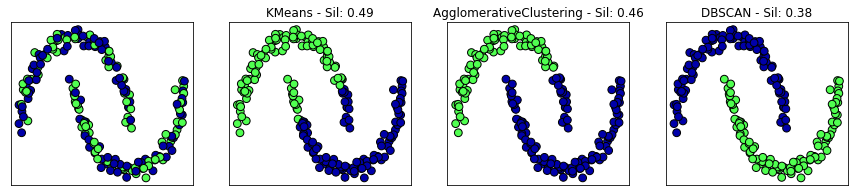

In [8]:
from sklearn.metrics.cluster import silhouette_score

X, y = make_moons(n_samples = 200, noise = .05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
                        subplot_kw={'xticks': (), 'yticks':()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
               cmap=mg.cm3, s=60, edgecolor='black')

for ax, algorithm in zip(axes[1:], algorithms):
    clusters= algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mg.cm3, s=60, edgecolor='black')
    ax.set_title("{} - Sil: {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled, clusters)))

In [9]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
    
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]
X_people = X_people / 255.

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

from sklearn.decomposition import PCA, NMF
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=42)

/tmp/ipykernel_15388/2190050671.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of it

In [10]:
pca = PCA(n_components=100, whiten=True, random_state=0)
X_pca = pca.fit_transform(X_people)

In [11]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print(np.unique(labels))

[-1]


In [12]:
dbscan = DBSCAN(min_samples= 3)
labels = dbscan.fit_predict(X_pca)
print(np.unique(labels))

[-1]


In [13]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print(np.unique(labels))

[-1  0]


In [14]:
np.bincount(labels + 1)

array([  32, 2031])

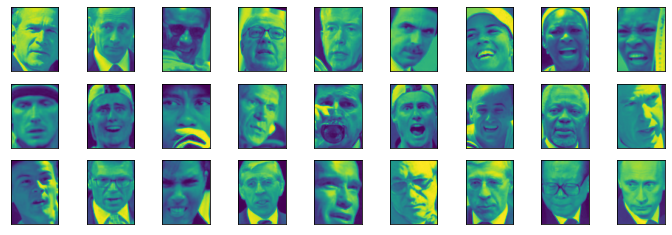

In [18]:
noise = X_people[labels==-1]

fig, axes = plt.subplots(3, 9, figsize=(12, 4), subplot_kw={'xticks': (), 'yticks': ()})

for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [19]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print(eps)
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)
    print(len(np.unique(labels)))
    print(np.bincount(labels + 1))

1
1
[2063]
3
1
[2063]
5
1
[2063]
7
14
[2004    3   14    7    4    3    3    4    4    3    3    5    3    3]
9
4
[1307  750    3    3]
11
2
[ 413 1650]
13
2
[ 120 1943]


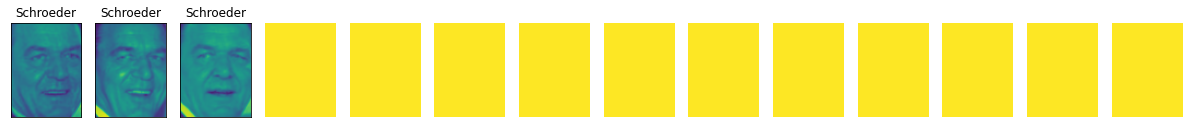

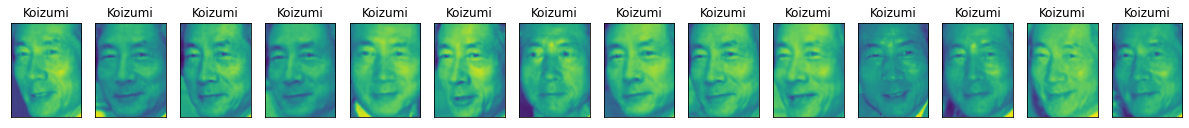

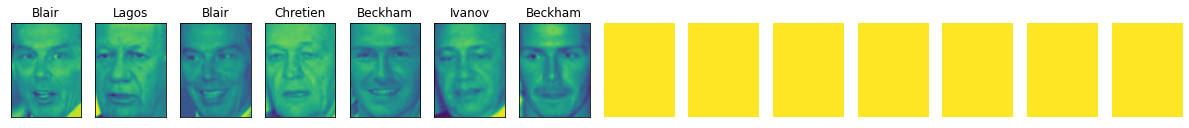

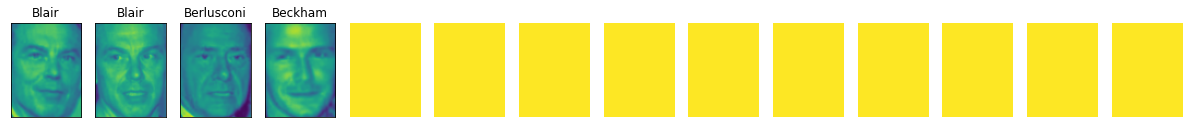

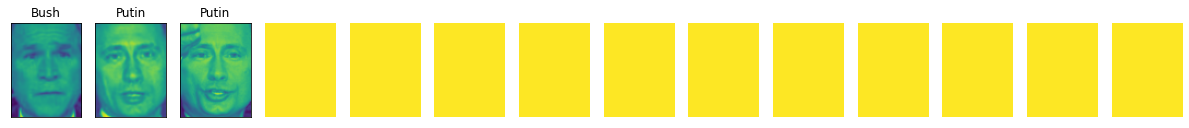

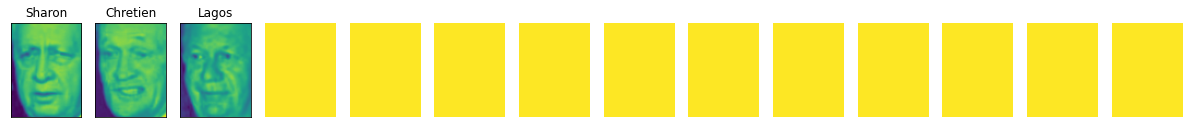

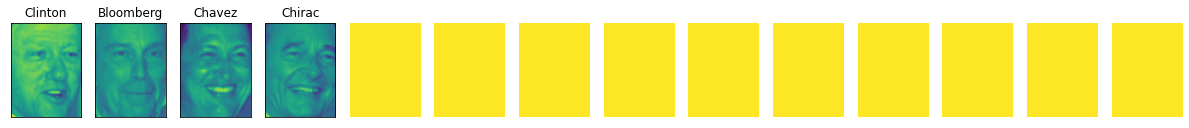

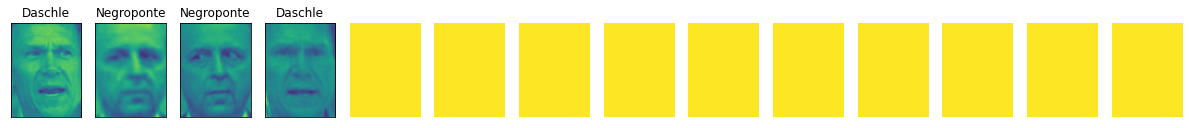

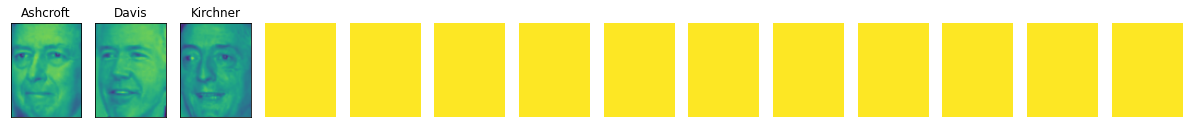

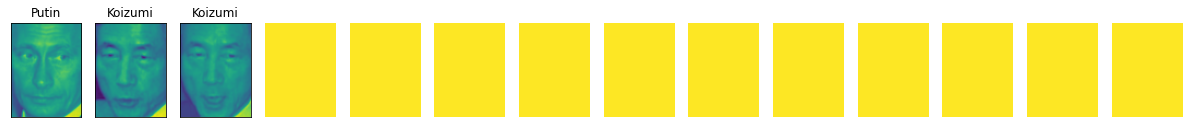

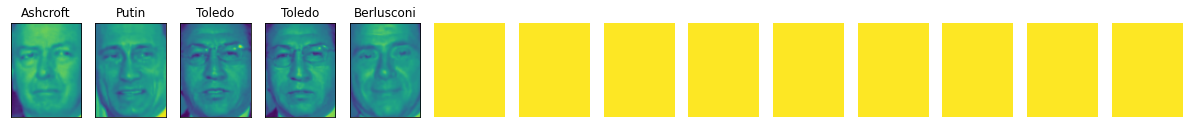

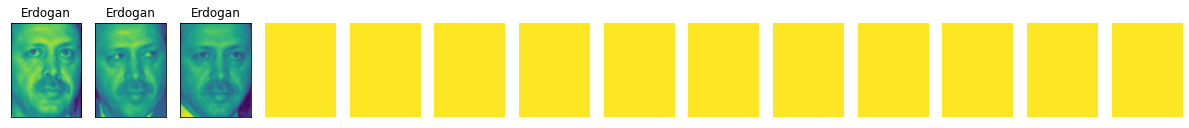

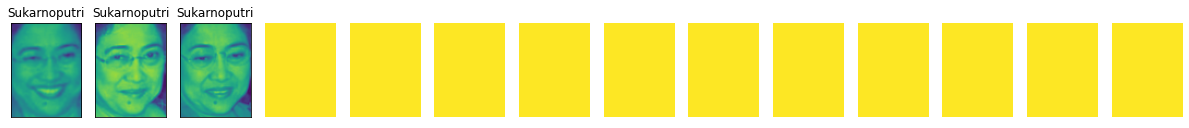

In [21]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, 14, figsize = (14*1.5, 4), subplot_kw={'xticks':(), 'yticks':()})
    
    i = 0
    
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
        i += 1
        
    for j in range(len(axes) - i):
        axes[j + i].imshow(np.array([[1] * 65] * 87), vmin=0, vmax=1)
        axes[j + i].axis('off')

In [23]:
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print(np.bincount(labels_km))

[155 175 238  75 358 257  91 219 323 172]


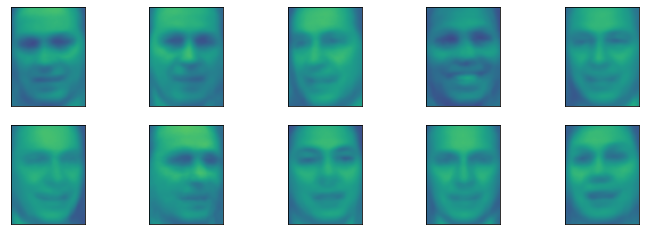

In [25]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks':(), 'yticks':()}, figsize=(12, 4))

for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

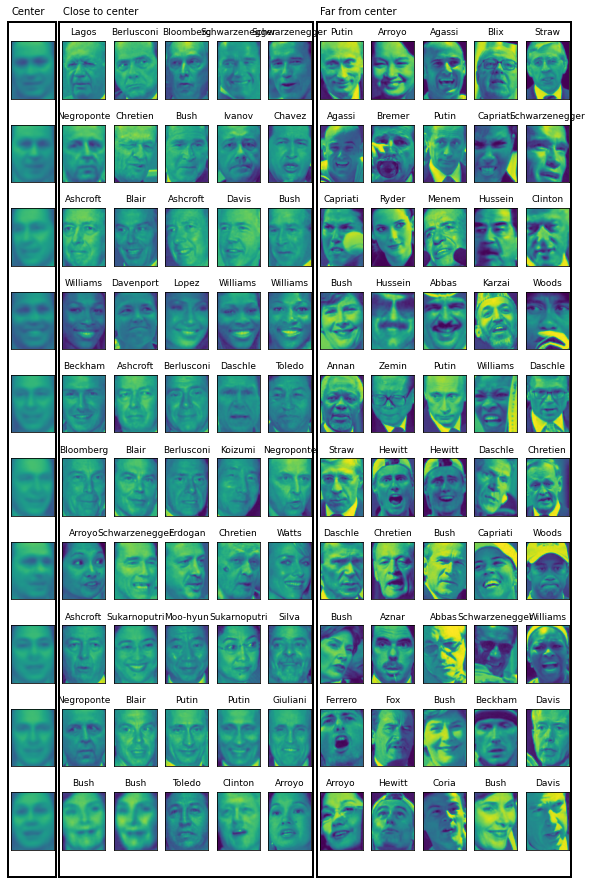

In [26]:
mg.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

In [27]:
agg = AgglomerativeClustering(n_clusters=10)
labels_agg = agg.fit_predict(X_pca)
print(np.bincount(labels_agg))

[169 660 144 329 217  85  18 261  31 149]


In [29]:

print(adjusted_rand_score(labels_agg, labels_km))

0.08710124457309265


In [31]:
from scipy.cluster.hierarchy import dendrogram, ward


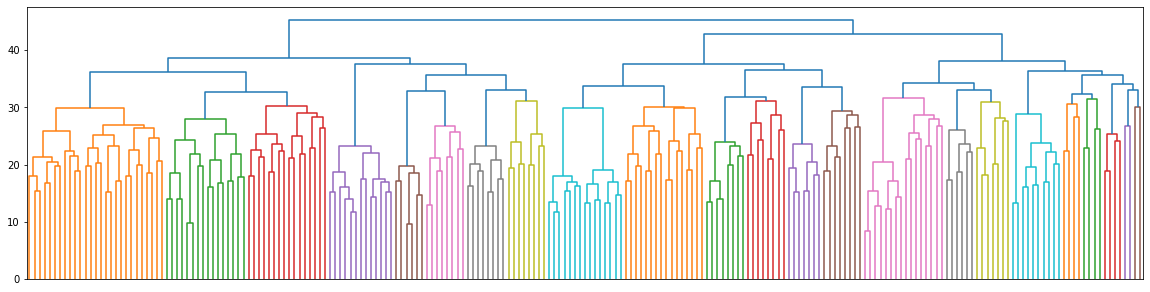

In [32]:
linkage_array = ward(X_pca)

plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)

ax = plt.gca()
bounds = ax.get_xbound()

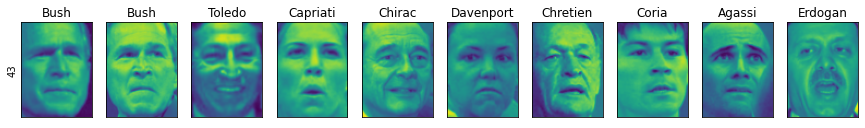

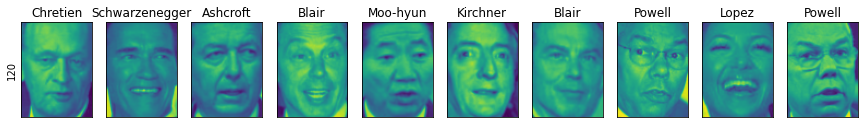

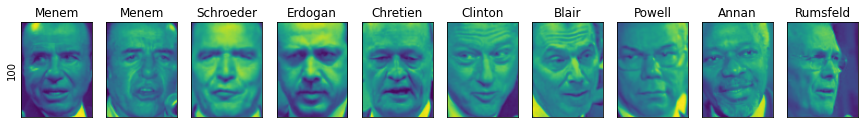

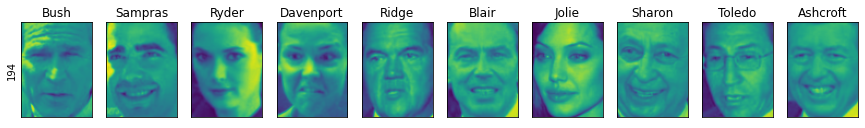

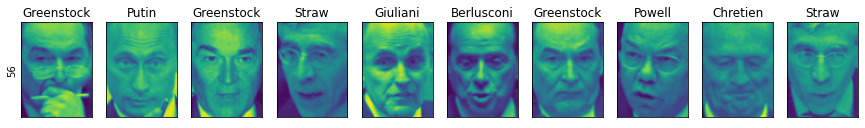

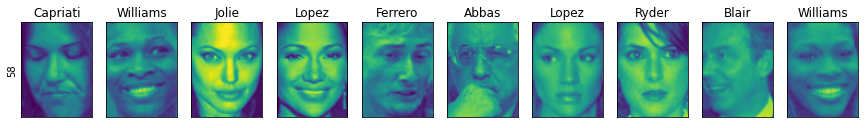

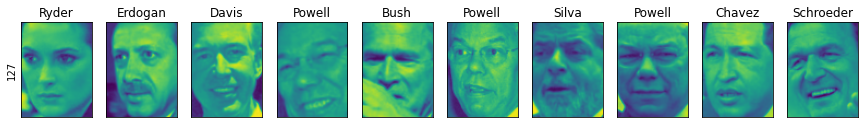

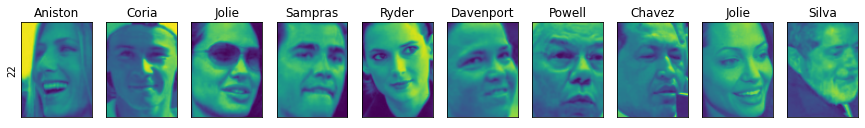

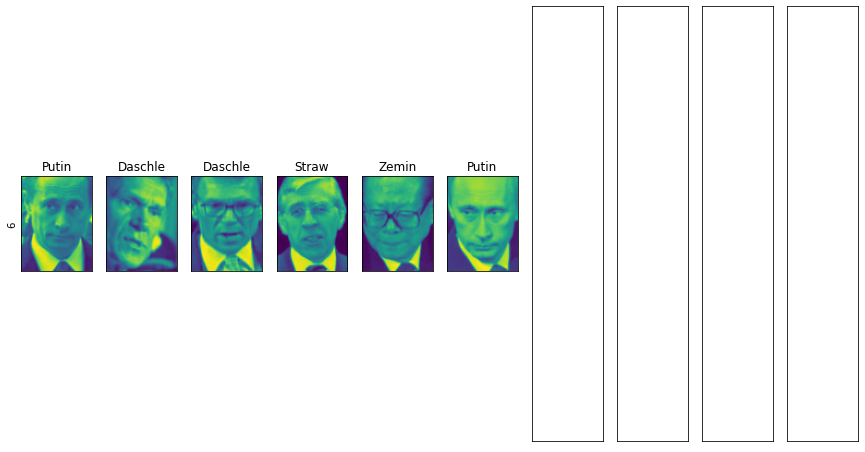

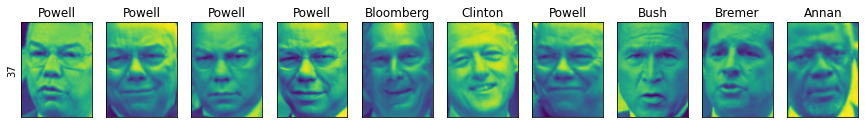

In [45]:
n_clusters=10

for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 10, subplot_kw={'xticks': (), 'yticks': ()},
                            figsize=(15, 8))
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                     labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

[ 43 120 100 194  56  58 127  22   6  37  65  49  84  18 168  44  47  31
  78  30 166  20  57  14  11  29  23   5   8  84  67  30  57  16  22  12
  29   2  26   8]


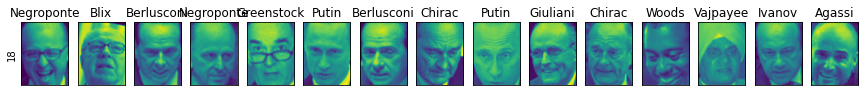

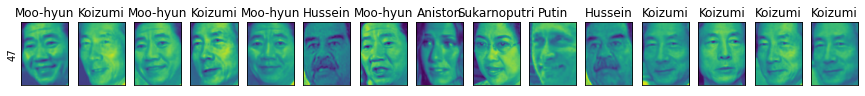

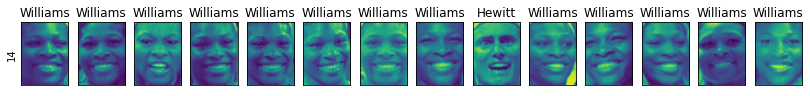

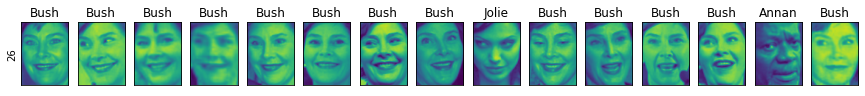

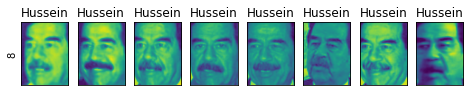

In [44]:
agg = AgglomerativeClustering(n_clusters=40)
labels_agg = agg.fit_predict(X_pca)
print(np.bincount(labels_agg))

n_clusters=40

for cluster in [13, 16, 23, 38, 39]:
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
                            figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel(np.sum(mask))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
                                     labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)